# Predicting Client's default risk
<br><br>

<font size="4.5">This analysis/forecast is going to be made using Random Forest algorithim. The motivations behind choosing such solution in this particular case are as follows:
<br>
- It produces good results without much hyper-paremeter tuning
- It is simple and diverse, therefore a good choice when the analysis needs to be done quickly (as in this case)
- It's been used in similar cases (Schonlau and Zou, 2020)
- Random forests are more accurate when the dataset is large (as in this case)
<br>
To build the algorithm 14 features were used. Here's a quick overview with explanation as to why this variable was chosen:
    
| Feature Name            | Description                      | Why it was used |
| :---                    |    :----:                        |          ---: |
| OCCUPATION_TYPE         |What kind of occupation does the client have| Occupation type plays a very big role in current income but also income perspectives and perspectives of a Client if he/she is let go (if the Client had a good job earlier it is more probable that he/she gets a good job next time) |
| DAYS_BIRTH             |Client's age in days at the time of application | Age of the Client is important, since older Clients tend to be more reliable in terms of their financial situation than younger Clients |
| FLAG_OWN_CAR            |Flag if the client owns a car | Car ownership proves that the Client is able to finance a big buy and still be in a good financial condition, car has also a big share in people's total wealth and as such can add to Client's payment ability |
| FLAG_OWN_REALTY         |Flag if client owns a house or flat | A flat is an anther big aspect of the Client's total wealth and potentially is a asset that can be liquidated (although not with ease). Also, flat or house ownership proves the Client is able to make cyclical payments |
| CNT_CHILDREN            |Number of children the client has | The more children a Client has, the bigger financial responsibility for her/him, this can potentially be a very big risk factor |
| AMT_INCOME_TOTAL        |Income of the client | One of the most important features, it is a primary variable to assess the Client by. The higher the income the bigger the probability the Client will make payments on time |
| NAME_INCOME_TYPE        |Clients income type  | Type of income is extremely important because different income sources have different level of dependability and some are less risk-creating than others |
| NAME_EDUCATION_TYPE     |Level of highest education the client achieved | The higher educated the Client the better his material situation will be - now or potentially (statistically speaking |
| DAYS_EMPLOYED           |How many days before the application the person started current employment | If the person just started new job it can idicate he/she often changes occupation and his/hers income is not constant. And thus, if the Client has been working in the same job for the long period of time, it proves he/she is stable and trustworthy |
| REG_REGION_NOT_LIVE_REGION| Flag if client's permanent address does not match contact address | If Client permanent adress and contact adress are different it can idicate he/she is still somehow dependant (for example a student on the sources from the permanent adress. |
| ORGANIZATION_TYPE       |Type of organization where client works | Some types of organizations lay off their workers often. Workers from some types of organizations tend to be in better material conditions (corporate workers) |
| DAYS_DELAYED_PAYMENT    |Number of days the Client is late with payment | The longer the delay higher the risk of repeating this situations and even defaulting. This is one of the most important variables. |
| AMOUNT_UNDERPAID        |Amount by which the Client underpaid the installment | The higher this amout the bigger risk of repeating this situation and potentially defaulting. Also a very important variable |
| EXT_SOURCE_2            |Normalized score from external data source| Since this variable was chosen for the dataset it must hold a high value. External analysis is also very important. |
<br>

The other features were not used on the account of maintaining the simplicity of the model and their lesser importance in comparison with the chosen ones.

</font>

<br><br>
## 1. Importing data from files and basic explanatory analysis

In [1]:
features = ['OCCUPATION_TYPE_codes', 'EXT_SOURCE_2',
            'CODE_GENDER_codes', 'FLAG_OWN_CAR_codes', 'FLAG_OWN_REALTY_codes',
            'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE_codes', 'NAME_EDUCATION_TYPE_codes',
            'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE_codes', 'DAYS_DELAYED_PAYMENT',
            'AMOUNT_UNDERPAID']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading train and test data into pandas dataframes
data = pd.read_csv("/Users/Maciek/Desktop/Big Data/Banking Champions Competition/application_train.csv")
test_data = pd.read_csv("/Users/Maciek/Desktop/Big Data/Banking Champions Competition/application_test.csv")

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape


(307511, 122)


<font size="4.5">As can be seen above **the train dataset** consists of over 120 rows and more than 307,500 rows, therefore it is a large dataset with a very big number of potential features</font>

----

0: Client will be paying the loan on time
1: Client will have difficulty paying on time


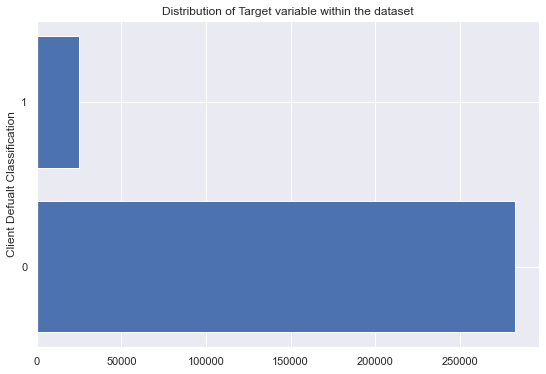

In [6]:
target_dist = data['TARGET'].value_counts() #counting the frequency of each target category
sns.set() #setting the visual appearence of the plot

fig, ax = plt.subplots(figsize=(9,6))

plt.barh(target_dist.index, target_dist.values) #creating horizontal barplot

plt.yticks([0,1])
plt.ylabel('Client Defualt Classification')
plt.title('Distribution of Target variable within the dataset') #formatting and naming

print("0: Client will be paying the loan on time")
print("1: Client will have difficulty paying on time") #desribing the value categories



<font size="4.5">In the horizontal bar plot above, it becomes visible that within the TRAIN dataset most of the values (282,686) are clients that have very low probability of default, only 24,825 clients are in the risk group. That makes the dataset imbalanced, therefore the methods used have to take that into account.</font>

___

The columns displaying data concering Client's home seems to be highly correlated among each other and also with different columns (highly as in noticeably higher than the rest), therefore those variables will not be used in the model.

## 2.Preparing the data for modelling

In [7]:
#checking if there are any columns with just one class
unique_cols = []

for c in data.columns: 
    if len(data[c].unique()) <=1:
        unique_cols.append(c)
        
unique_cols

[]

<font size="4.5">Above, the existance of columns with just one value is checked. Such values are useless in predicting, therefore must be thrown away.
Since there are no such columns, the analysis can proceed.</font>

---

In [8]:
categorical_cols = data.select_dtypes(include=["object"]) #creating a new dataset with only categorical (object) values
test_categorical_cols = data.select_dtypes(include=["object"]) #doing the same for the test table

In [9]:
categorical_cols.dtypes #checking if some columns need converting to another type

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [10]:
#creating columns with category dtype in order to later convert them to numeric ones (for both datasets - train and test)
#data[categorical_cols.columns].astype('category')
for c in categorical_cols.columns:
    data[c] = data[c].astype('category')
    data[c + '_codes'] = data[c].cat.codes
    
for tc in test_categorical_cols.columns:
    test_data[tc] = test_data[tc].astype('category')
    test_data[tc + '_codes'] = test_data[tc].cat.codes
    

In [11]:
data['NAME_EDUCATION_TYPE_codes'].value_counts()

4    218391
1     74863
2     10277
3      3816
0       164
Name: NAME_EDUCATION_TYPE_codes, dtype: int64

<font size="4.5"> Categorical variables must be converted to code numerical in order for the model to take them in to account properly. That's why all "object" type columns are identified and then converted to categorical numerical type</font>

___

## 3. Joining particular features from "Installments_payments" table with the main datasets

In [12]:
#reading a new table with installments payments to get more features for the model
installments = pd.read_csv("/Users/Maciek/Desktop/Banking Champions Competition/installments_payments.csv")

#creating a column with the number of days the Client delayed the payment by.
installments["DAYS_DELAYED_PAYMENT"] = (-1) * installments["DAYS_INSTALMENT"] - installments["DAYS_ENTRY_PAYMENT"]
installments["AMOUNT_UNDERPAID"] = installments["AMT_INSTALMENT"] - installments["AMT_PAYMENT"]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Maciek/Desktop/Banking Champions Competition/installments_payments.csv'

In [ ]:
installments.columns

In [ ]:
#creating a new helper table only with neccesary features
installments_features = installments[['SK_ID_CURR', 'DAYS_DELAYED_PAYMENT', 'AMOUNT_UNDERPAID']]

In [ ]:
#a list with columns needed for modelling
needed_cols = ['SK_ID_CURR', 'TARGET', 'OCCUPATION_TYPE_codes', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
            'FLAG_OWN_CAR_codes', 'FLAG_OWN_REALTY_codes', 'DAYS_BIRTH',
            'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE_codes', 'NAME_EDUCATION_TYPE_codes',
            'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE_codes']

needed_cols2 = ['SK_ID_CURR', 'OCCUPATION_TYPE_codes', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
            'FLAG_OWN_CAR_codes', 'FLAG_OWN_REALTY_codes', 'DAYS_BIRTH',
            'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE_codes', 'NAME_EDUCATION_TYPE_codes',
            'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE_codes']

#joining main data table with helper installments table

model_data = data[needed_cols]
model_test_data = test_data[needed_cols2]
model_data = model_data.join(installments_features, on="SK_ID_CURR", rsuffix='join_', how='left')
model_test_data = model_test_data.join(installments_features, on="SK_ID_CURR", rsuffix='join_', how='left')

In [ ]:
model_data.shape

<font size="4.5"> In order to include variables from the installments_payments dataset, which are one of the most important, the proper join must be performed. First, relevant columns are synthesized into two: "DAYS_DELAYED_PAYMENT" and "AMOUNT_UNDERPAID", then those columns are joined on a common key with main data (both train and test) using left join.</font>

___

In [ ]:
#checking if there are any columns with null data

model_data.isna().any()

In [ ]:
model_test_data.isna().any()

In [ ]:

#counting the number of null values on each of the identified columns
nan_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
print('EXT_SOURCE_1 null values counts (True)')
print(model_data['EXT_SOURCE_1'].isnull().value_counts())
print()
print('EXT_SOURCE_2 null values counts (True)')
print(model_data['EXT_SOURCE_2'].isnull().value_counts())
print()
print('EXT_SOURCE_3 null values counts (True)')
print(model_data['EXT_SOURCE_3'].isnull().value_counts())

In [ ]:

#counting the number of null values on each of the identified columns in the test dataset
nan_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
print('EXT_SOURCE_1 null values counts (True)')
print(model_test_data['EXT_SOURCE_1'].isnull().value_counts())
print()
print('EXT_SOURCE_2 null values counts (True)')
print(model_test_data['EXT_SOURCE_2'].isnull().value_counts())
print()
print('EXT_SOURCE_3 null values counts (True)')
print(model_test_data['EXT_SOURCE_3'].isnull().value_counts())

<font size="4.5">Handling null values is a next step, without which the model would not work.
<br><br>
A very large number of null values in both ext_source 1 and 3 makes it very hard to use these columns in the model, therefore those variables will not be used. Only EXT_SOURCE_2 has a small number of null values. In this case the rows with null values in EXT_SOURCE_2 will be deleted, which will not influence in a significant way the performance of the model.</font>

In [ ]:
#dropping the chosen column
model_data.drop(['EXT_SOURCE_1', 'EXT_SOURCE_3'], axis=1, inplace=True)
model_test_data.drop(['EXT_SOURCE_1', 'EXT_SOURCE_3'], axis=1, inplace=True)

In [ ]:
#removing the rows with null values in EXT_SOURCE_2 column
model_data.dropna(how='any', axis=0, inplace=True)
model_test_data.dropna(how='any', axis=0, inplace=True)

In [ ]:
model_data.isna().any() #checking if there are any left null values

In [ ]:
model_test_data.isna().any()

In [ ]:
model_test_data.shape

<font size="4.5"> Null values have been cleansed and data is ready for modelling</font>
    
___

## 4. Building the test model

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y = model_data['TARGET'] #defining the target variable

#creating a list with features that are gonna be used in the model
features = ['OCCUPATION_TYPE_codes', 'EXT_SOURCE_2', ''
            'FLAG_OWN_CAR_codes', 'FLAG_OWN_REALTY_codes', 'DAYS_BIRTH',
            'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE_codes', 'NAME_EDUCATION_TYPE_codes',
            'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE_codes', 'DAYS_DELAYED_PAYMENT',
            'AMOUNT_UNDERPAID']

X = model_data[features] #defining the variable

#splitting the original train dataset into two, in order to be able to test
#the results and optimize the performance
train_X, val_X, train_y, val_y = train_test_split(X, y)

<font size="4.5"> The test data doesn't include Target values so it is hard to optimize the model based on this table. That's why a train dataset has been split in two parts (it is large enough to be split): a train set and a test set, in order to make the optimization procedure possible.</font>

In [ ]:
#building a model on a new splitted train dataset - first without optimization
testing_model = DecisionTreeClassifier()
testing_model.fit(train_X, train_y)

In [ ]:
#predicting the target value on a new test data
test_predictions = testing_model.predict(val_X)

#importing relevant performance metric
from sklearn.metrics import confusion_matrix

#creating a confusion matrix with the results
conf_mat = confusion_matrix(y_true=val_y, y_pred=test_predictions)

#calculating the accuracy
accuracy = (conf_mat[0,0]+conf_mat[1,1])/conf_mat.sum()
print("The accuracy of the model is:")
print(accuracy)

In [ ]:
#defining the function that automatically checks the accuracy of the model
#with given parameters (especially max_leaf_nodes)
def get_accuracy(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=40)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    matrix = confusion_matrix(y_true=val_y, y_pred=preds_val)
    accuracy = (matrix[0,0]+matrix[1,1])/matrix.sum()
    return accuracy

In [ ]:
#testing the number of max leaf nodes to improve accuracy
max_leaf_nodes = [2, 4, 6, 8, 10, 40, 80, 100, 200, 500, 1000, 5000, 10000, 100000, None]

node_accuracy = {}

#creating a dictionary with accuracies of models with different max_leaf_nodes_values
for node in max_leaf_nodes:
    accuracy = get_accuracy(node, train_X, val_X, train_y, val_y)
    node_accuracy[node] = accuracy

In [ ]:
print('Accuracies of the model with different max leaf nodes:')
node_accuracy

<font size="4.5"> Basic model set up predicted the target with only 85% accuracy. In order to fix data, an appropriate function has been built to test the accuracies measured by the confusion_matrix. Looking at the accuracies of the data, the significant drop in the accuracy is between 1000 and 5000 maximum nodes
</font>

___

## 5. Building the final model

In [ ]:
#building a model with new specifications on original test data

#Defining the model with optimal number of max leaf nodes and fitting the data
homecredit_model_2 = DecisionTreeClassifier(max_leaf_nodes=1000, random_state=40) #
homecredit_model_2.fit(X, y)

#creating a test features dataset
test_x_2 = model_test_data[features]

#predicting the target using the test features
target_predictions_2 = homecredit_model_2.predict(test_x_2)

In [ ]:
model_test_data[features].columns

In [ ]:
#displaying the distribution of predicted values
target_predictions_2 = pd.Series(target_predictions_2)
preds = target_predictions_2.value_counts()
preds

<font size="4.5">In the final, optimized model number of max_leaf_nodes used was 1000, to account for the fact that with smaller numbers the model did not predict any defaults, and this value, according to tests is the highest value at which the model is almost as accurate as with the smaller values. 
<br><br>
At final the model amongst 48736 Client's the model predicted 332 Defaults.</font>

### Bibliography:
<br>
(1) Schonlau, M. and Zou, R., 2020. The random forest algorithm for statistical learning. The Stata Journal: Promoting communications on statistics and Stata, 20(1).<br>